In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

### Configure visualization parameters

In [27]:
rc = {'axes.facecolor':'white',
      'axes.grid' : False,
      'grid.color': '.9',
      'font.family':'Arial',
      'font.size' : 10,
      "figure.figsize": "4.854, 3",
      "figure.dpi": 400,
      "axes.spines.right": False,
      "axes.spines.left": False,
      "axes.spines.bottom": False,
      "axes.spines.top": False,
      "xtick.bottom": False,
      "ytick.left": False,
      }
      
plt.rcParams.update(rc)

In [28]:
merged = pd.read_pickle("/Users/taekunkim/Documents/github/flock-freight/data/pickles/merged_clean.pkl")
subset = merged[["PALLETIZED_LINEAR_FEET", "REFERENCE_NUMBER", "OFFER_TYPE", "RATE_USD", "LOAD_DELIVERED_FROM_OFFER", "CREATED_ON_HQ", "ORDER_DATETIME_PST"]]
subset["FEET_BIN"] = subset["PALLETIZED_LINEAR_FEET"]//5*5

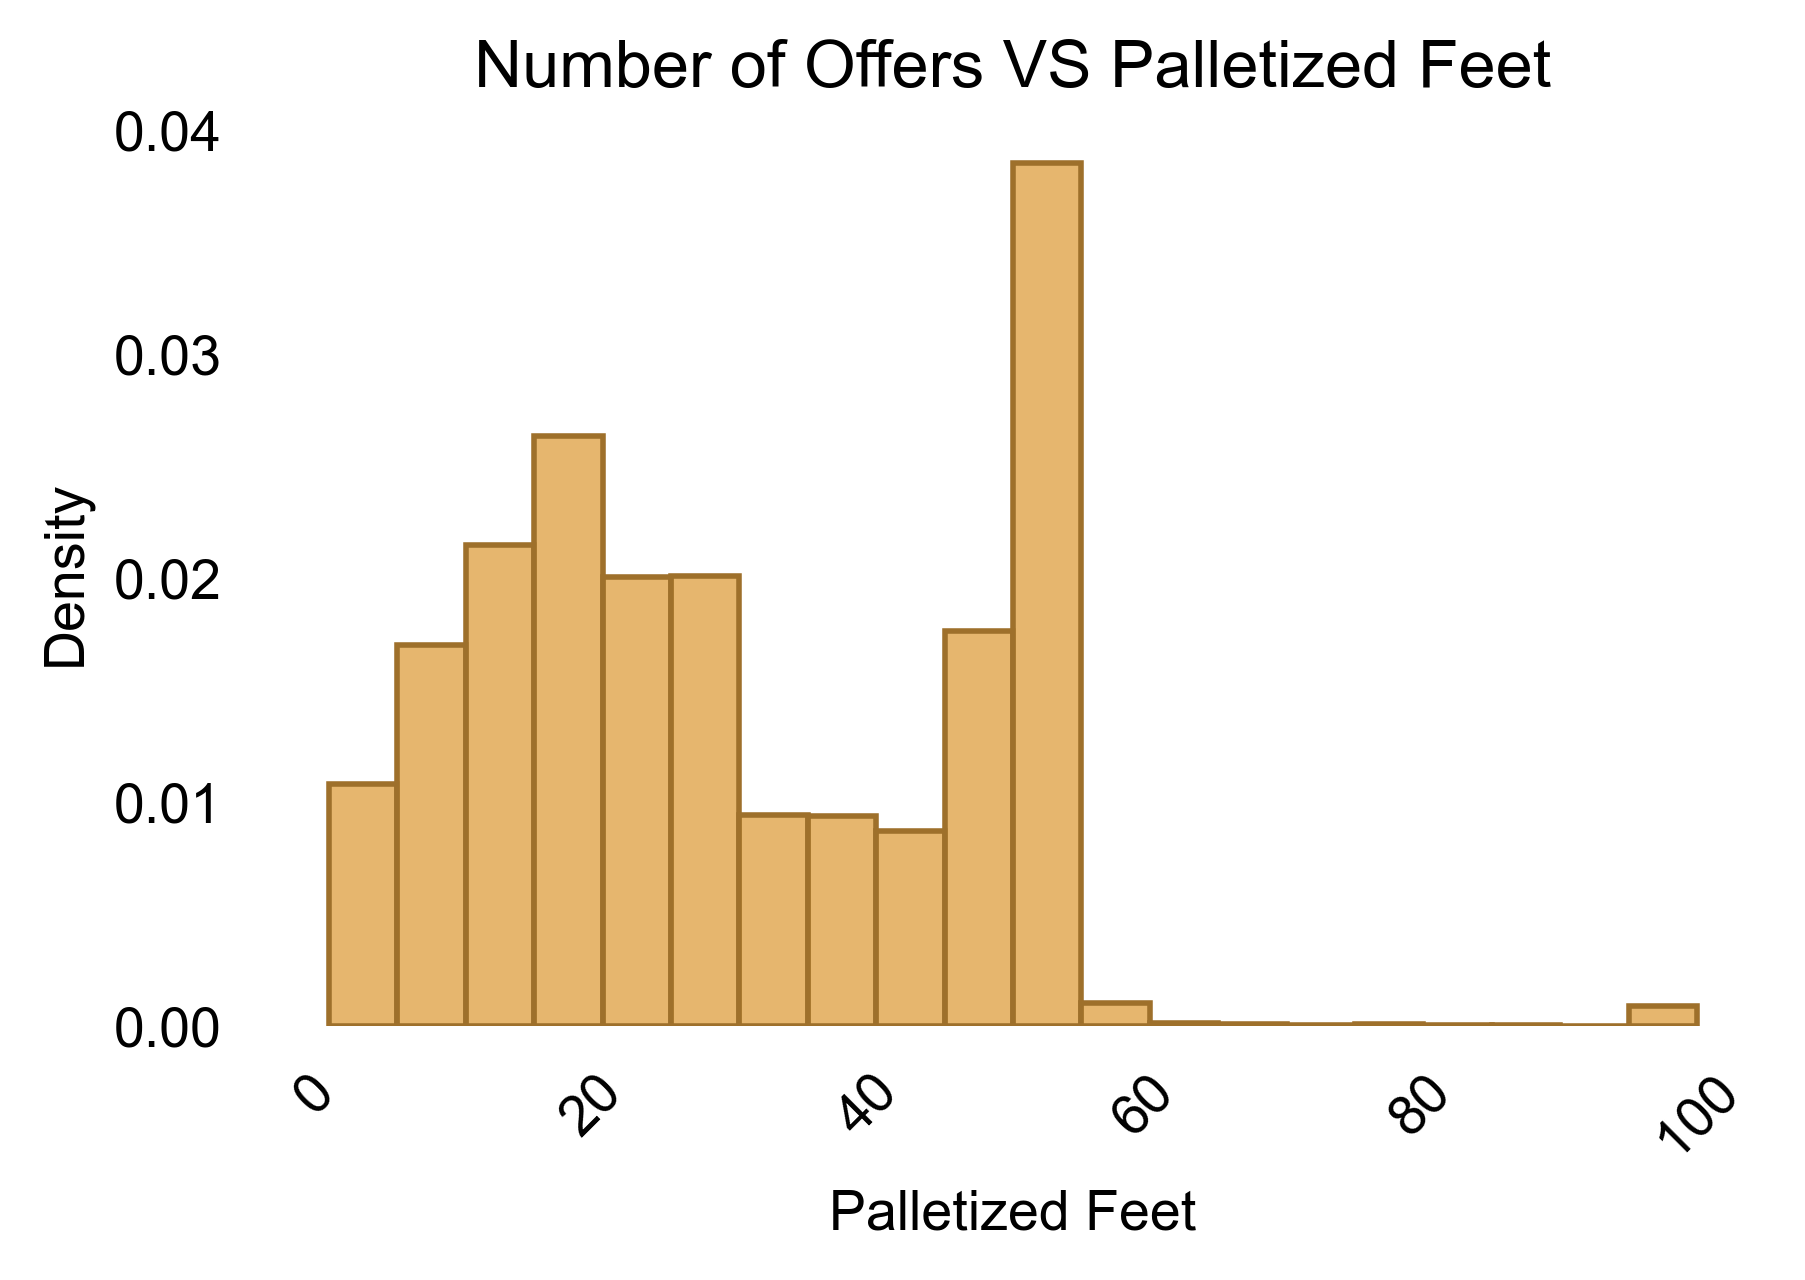

In [29]:
plot = sns.histplot(
    subset["PALLETIZED_LINEAR_FEET"], 
    bins=20, 
    stat="density", 
    color="#de9e3e", 
    edgecolor="#9e702b", 
    linewidth=1)

plt.title("Number of Offers VS Palletized Feet")
plt.xlabel("Palletized Feet")
plt.ylabel("Density")
plt.xticks(rotation=45)
plt.show()

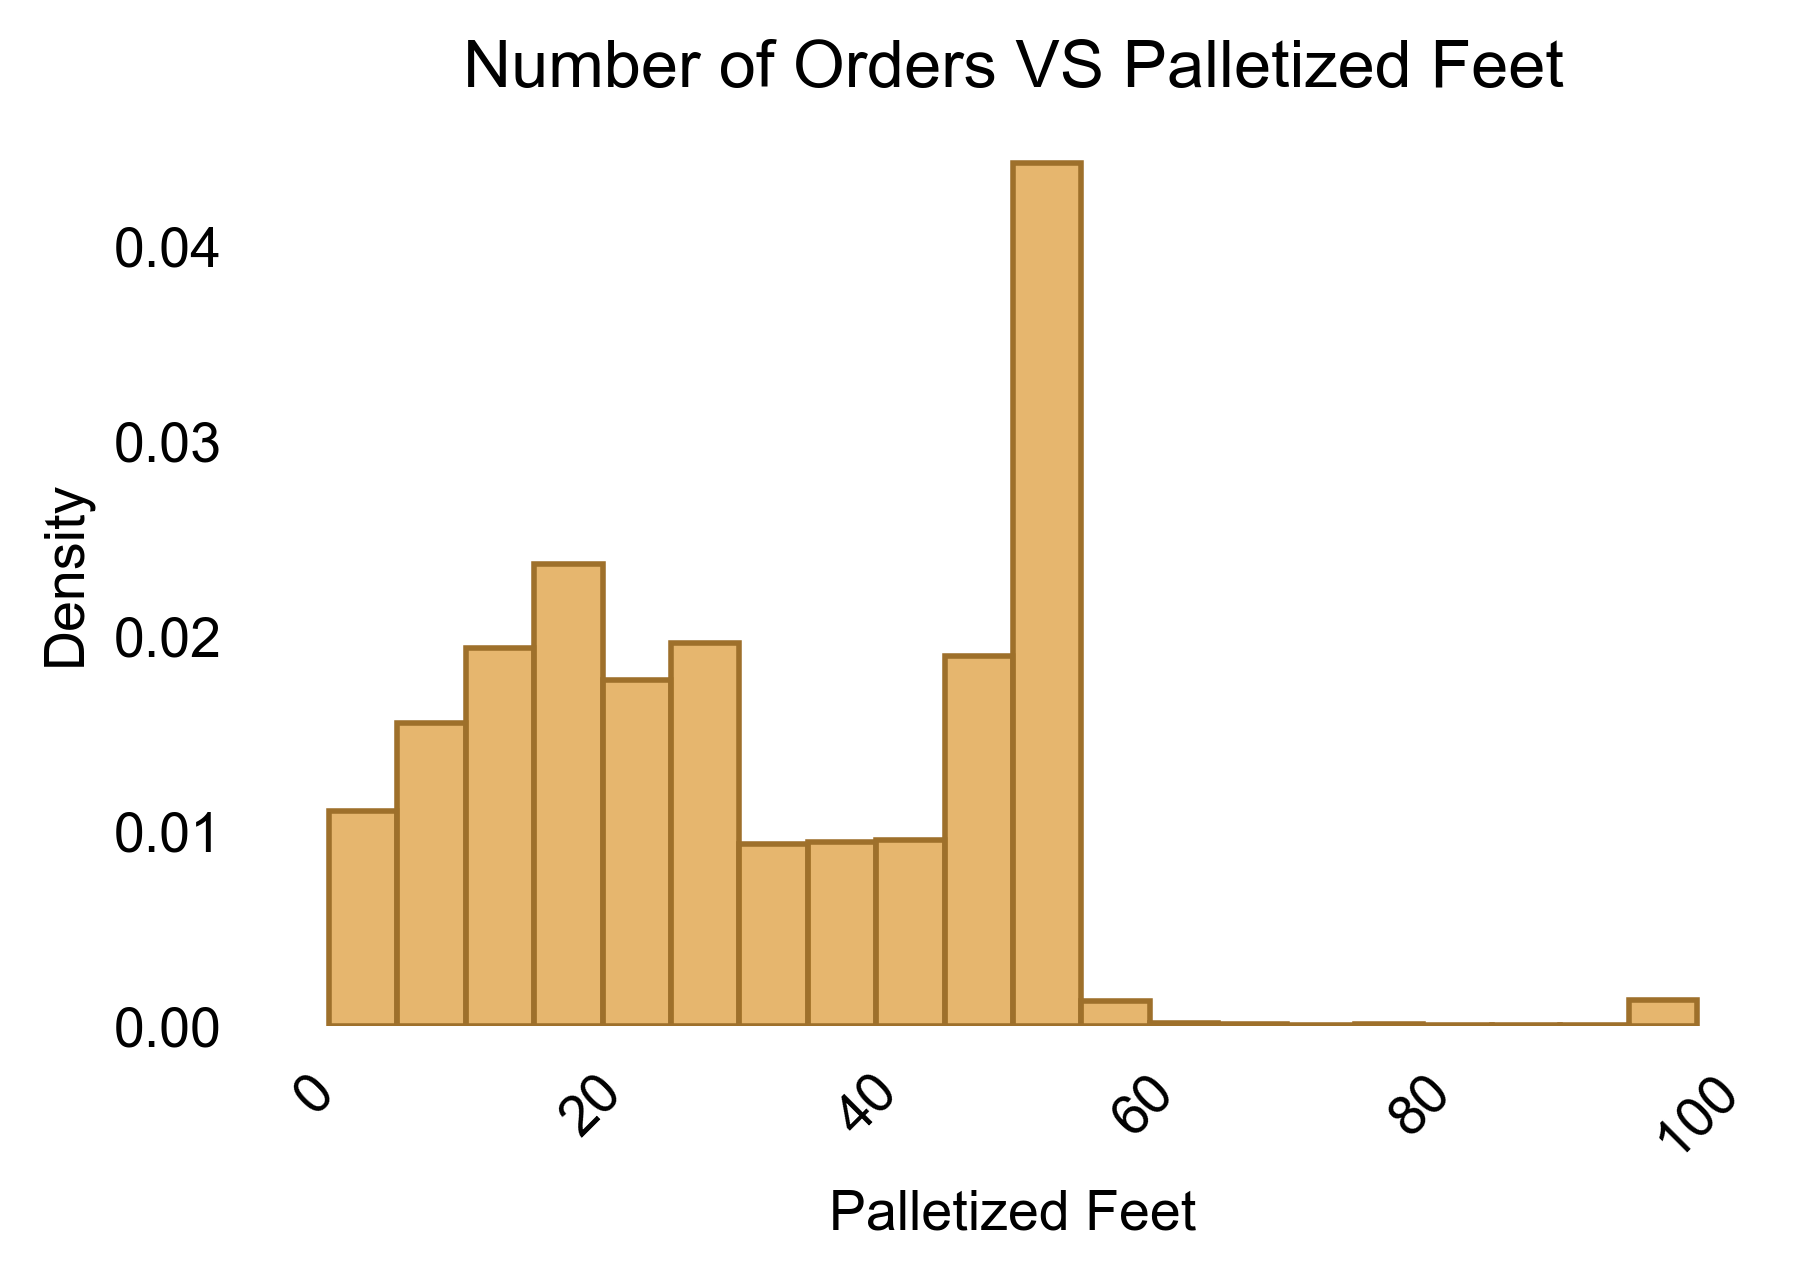

In [30]:
plot = sns.histplot(
    subset.groupby("REFERENCE_NUMBER").first()["PALLETIZED_LINEAR_FEET"].values,     
    bins=20, 
    stat="density", 
    color="#de9e3e", 
    edgecolor="#9e702b", 
    linewidth=1)

plt.title("Number of Orders VS Palletized Feet")
plt.xlabel("Palletized Feet")
plt.ylabel("Density")
plt.xticks(rotation=45)
plt.show()

### There are outliers that have 60+ ft of palletized linear length
We drop them in further analyses.

In [5]:
subset = subset[subset["PALLETIZED_LINEAR_FEET"]<60]

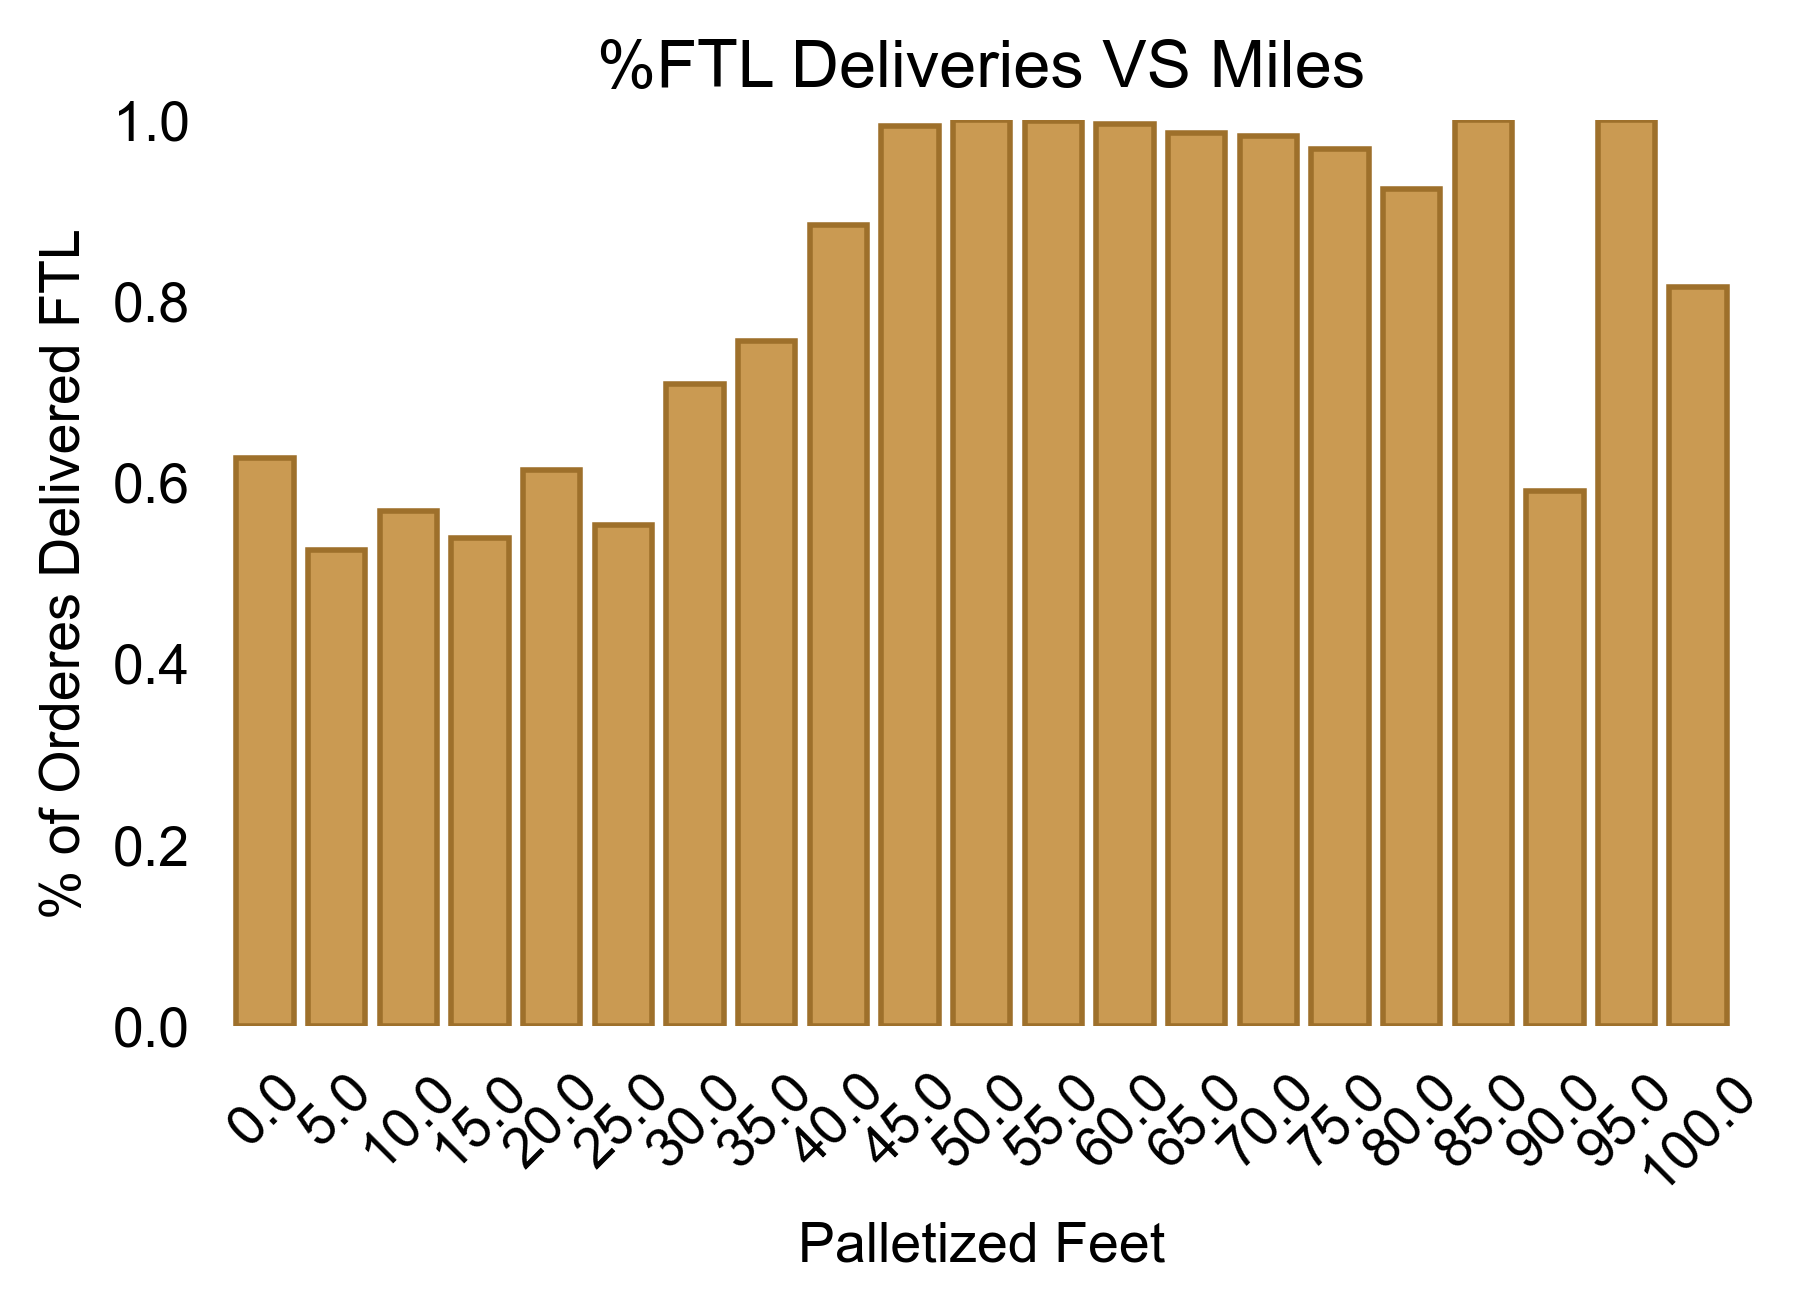

In [35]:
subset["IS_FTL"] = subset["OFFER_TYPE"] != "pool"

plot = sns.barplot(
    data=subset[subset["LOAD_DELIVERED_FROM_OFFER"]].groupby("FEET_BIN").agg({"IS_FTL": "mean"}).reset_index(), 
    x="FEET_BIN", 
    y="IS_FTL",
    color="#de9e3e", 
    edgecolor="#9e702b", 
    linewidth=1
    )

plt.title("%FTL Deliveries VS Miles")
plt.xlabel("Palletized Feet")
plt.ylabel("% of Orderes Delivered FTL")
plt.xticks(rotation=45)
plt.ylim(0, 1)
plt.show()

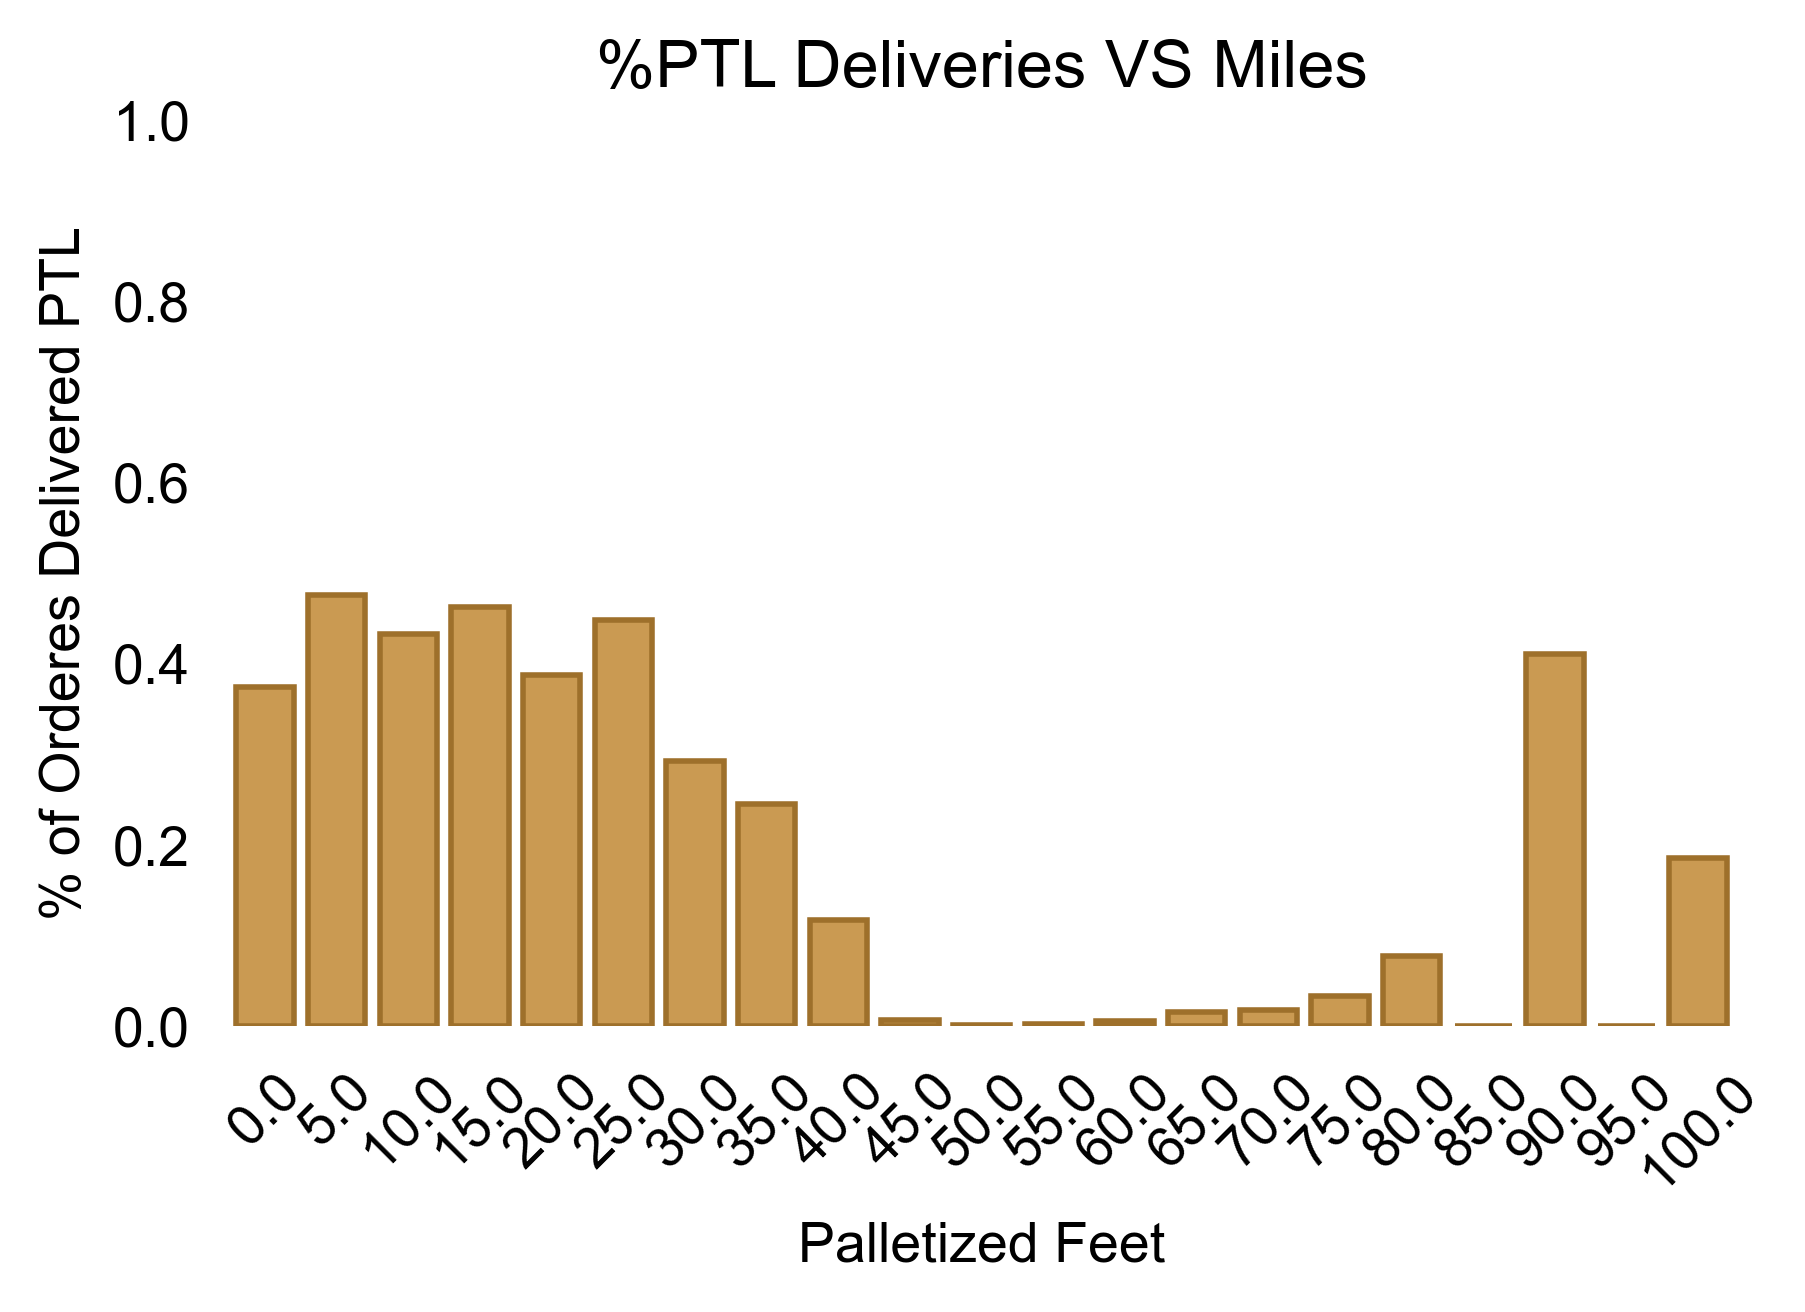

In [36]:
subset["IS_PTL"] = subset["OFFER_TYPE"] == "pool"


plot = sns.barplot(
    data=subset[subset["LOAD_DELIVERED_FROM_OFFER"]].groupby("FEET_BIN").agg({"IS_PTL": "mean"}).reset_index(), 
    x="FEET_BIN", 
    y="IS_PTL",
    color="#de9e3e", 
    edgecolor="#9e702b", 
    linewidth=1
    )

plt.title("%PTL Deliveries VS Miles")
plt.xlabel("Palletized Feet")
plt.ylabel("% of Orderes Delivered PTL")
plt.xticks(rotation=45)
plt.ylim(0, 1)
plt.show()

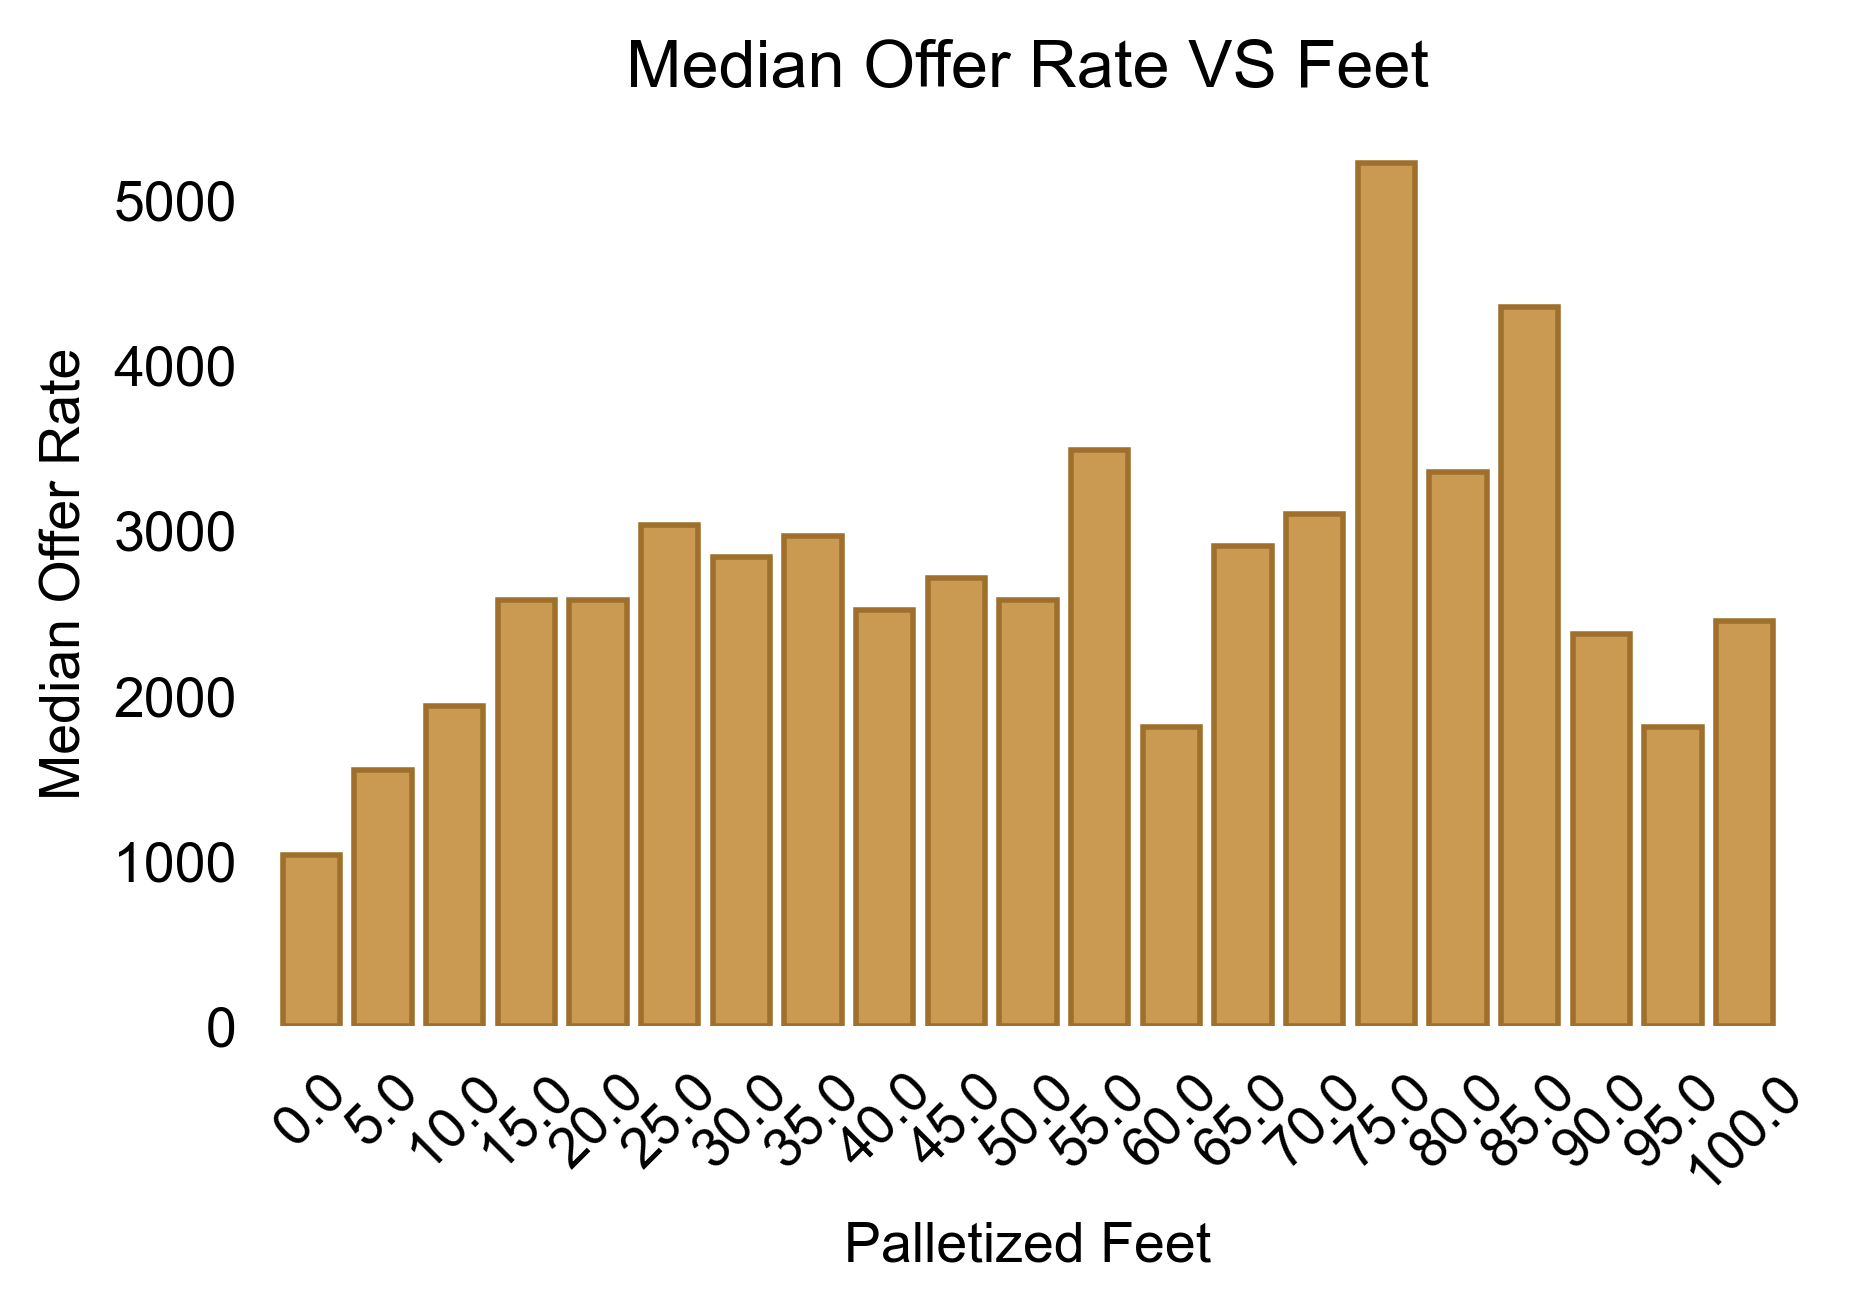

In [38]:
plot = sns.barplot(
    data=subset[subset["LOAD_DELIVERED_FROM_OFFER"]].groupby("FEET_BIN")["RATE_USD"].median().to_frame().reset_index(), 
    x="FEET_BIN", 
    y="RATE_USD",
    color="#de9e3e", 
    edgecolor="#9e702b", 
    linewidth=1
    )

plt.title("Median Offer Rate VS Feet")
plt.xlabel("Palletized Feet")
plt.ylabel("Median Offer Rate")
plt.xticks(rotation=45)
plt.show()

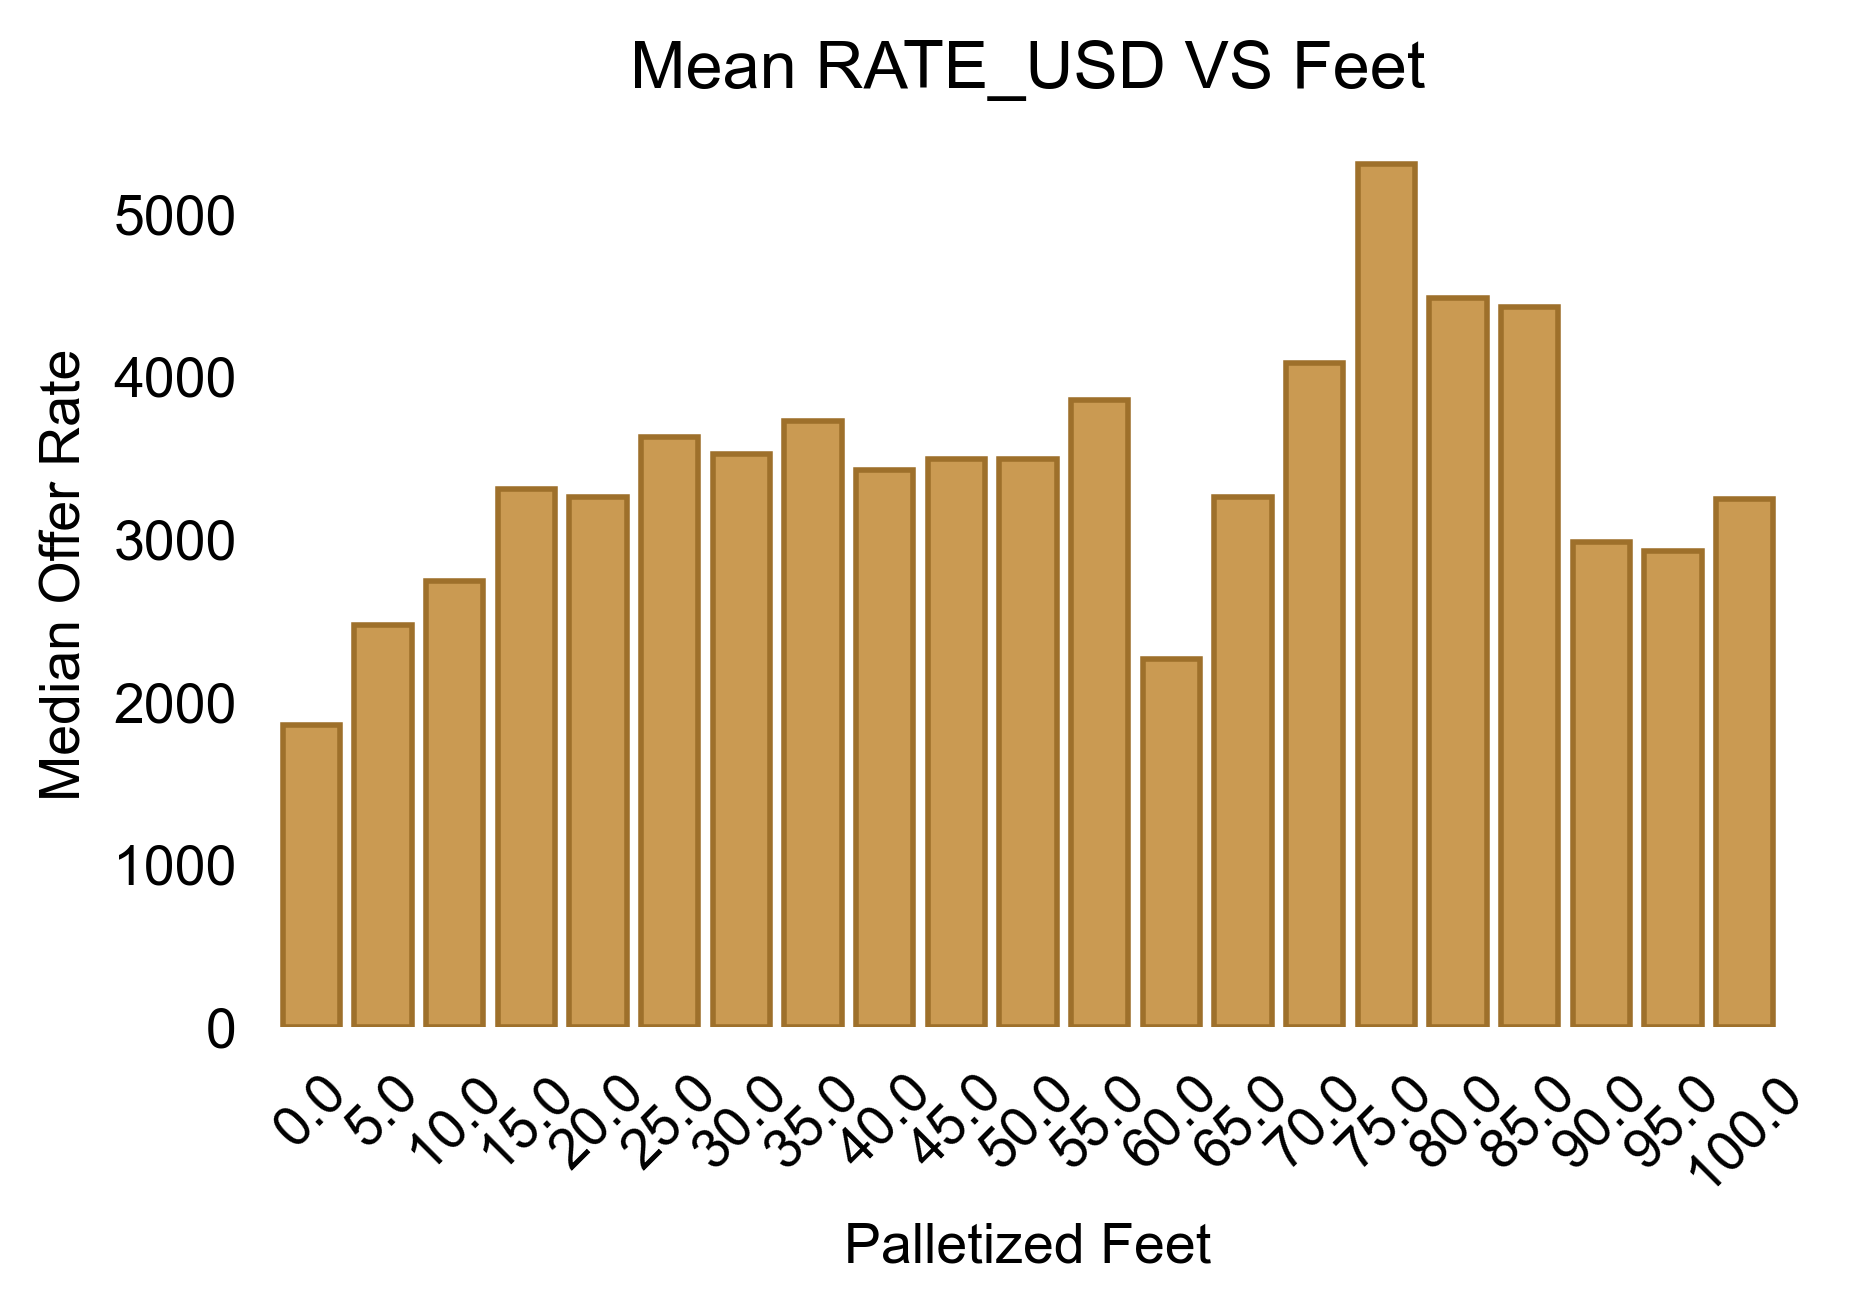

In [39]:
plot = sns.barplot(
    data=subset[subset["LOAD_DELIVERED_FROM_OFFER"]].groupby("FEET_BIN")["RATE_USD"].mean().to_frame().reset_index(), 
    x="FEET_BIN", 
    y="RATE_USD",
    color="#de9e3e", 
    edgecolor="#9e702b", 
    linewidth=1
    )

plt.title("Mean RATE_USD VS Feet")
plt.xlabel("Palletized Feet")
plt.ylabel("Median Offer Rate")
plt.xticks(rotation=45)
plt.show()

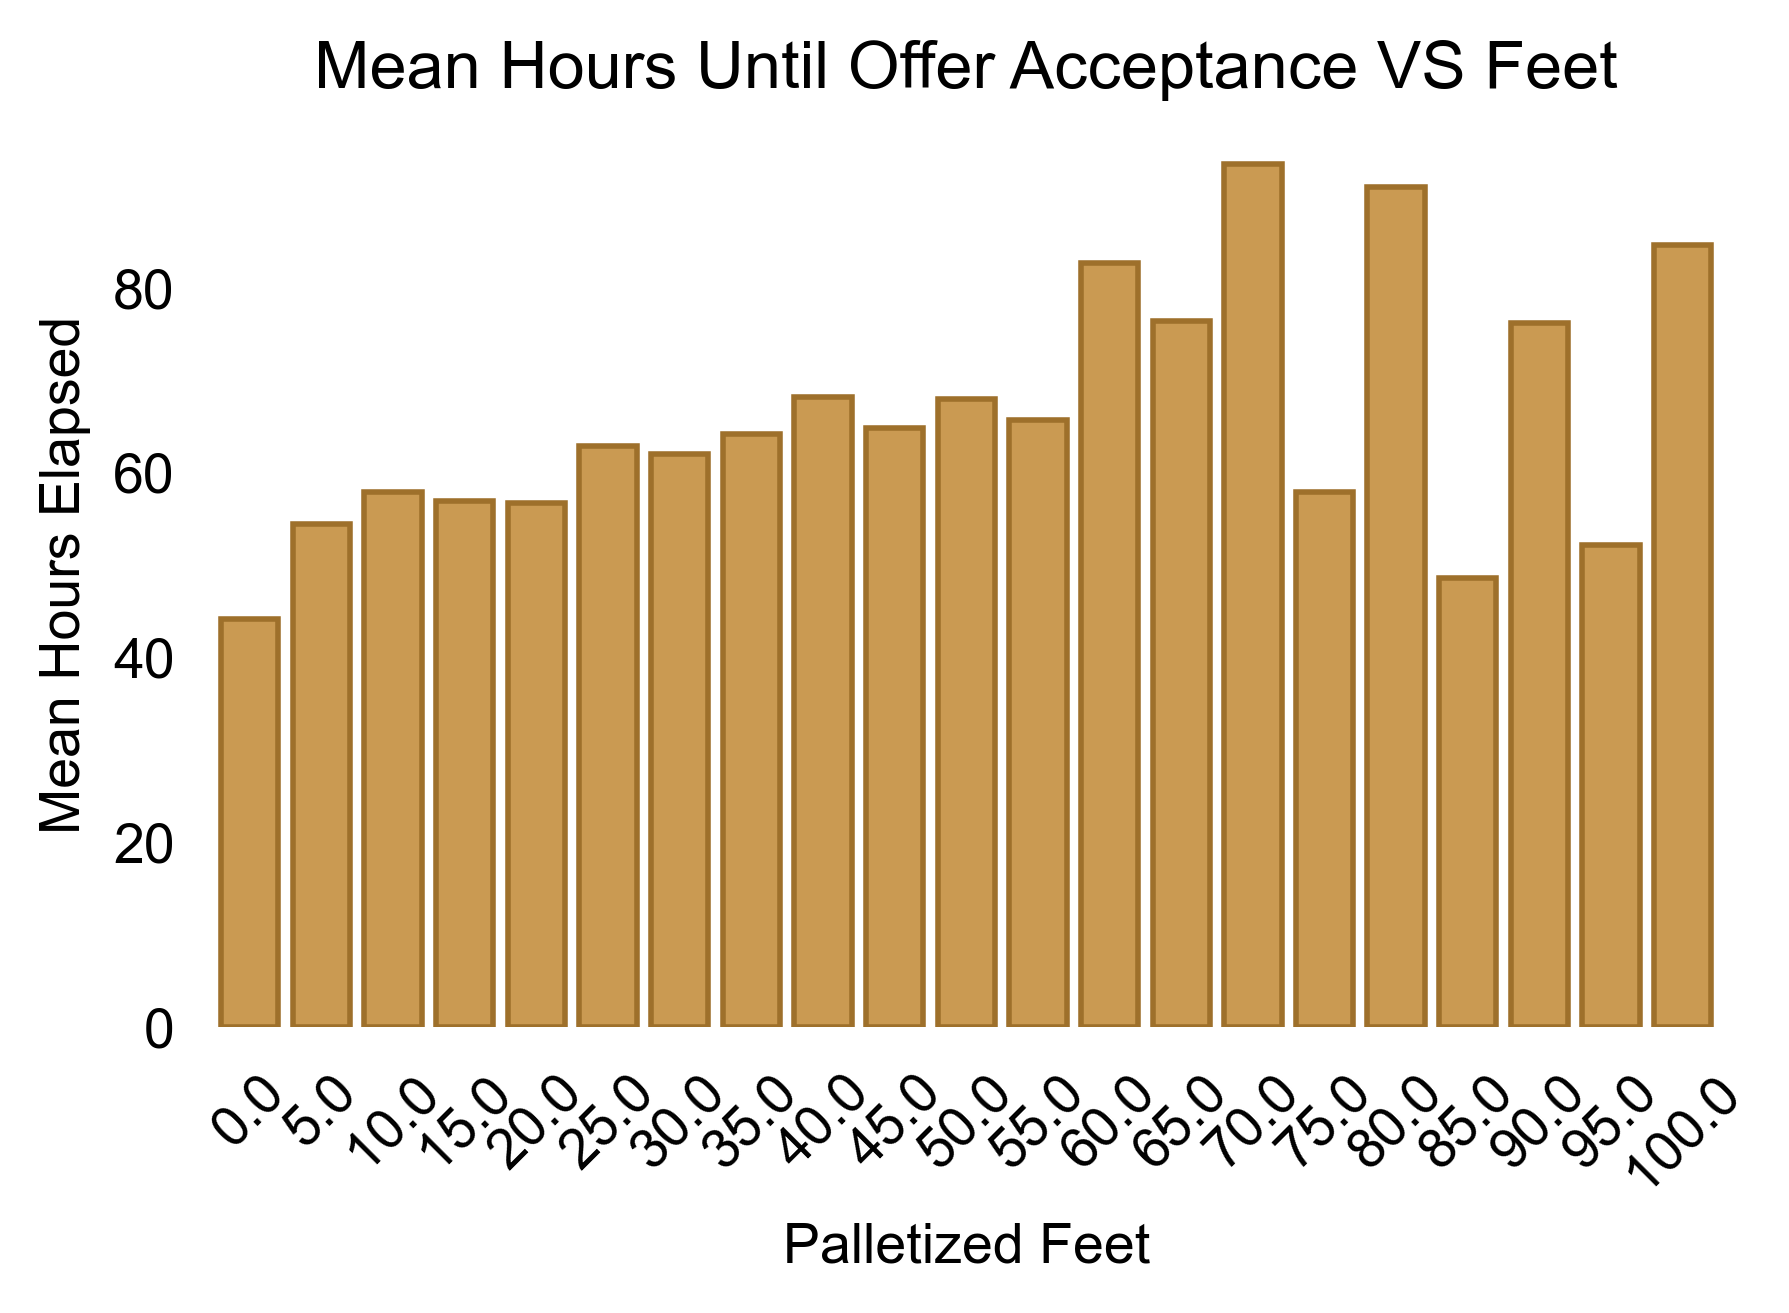

In [43]:
time_vs_feet = subset[subset["LOAD_DELIVERED_FROM_OFFER"]]
time_vs_feet["ELAPSED TIME"] = time_vs_feet["CREATED_ON_HQ"] - time_vs_feet["ORDER_DATETIME_PST"]
time_vs_feet["ELAPSED TIME"] = time_vs_feet["ELAPSED TIME"] // np.timedelta64(1, 'h')

plot = sns.barplot(
    data=time_vs_feet.groupby("FEET_BIN").mean().reset_index(), 
    x="FEET_BIN", 
    y="ELAPSED TIME",
    color="#de9e3e", 
    edgecolor="#9e702b", 
    linewidth=1
    )

plt.title("Mean Hours Until Offer Acceptance VS Feet")
plt.xlabel("Palletized Feet")
plt.ylabel("Mean Hours Elapsed")
plt.xticks(rotation=45)
plt.show()

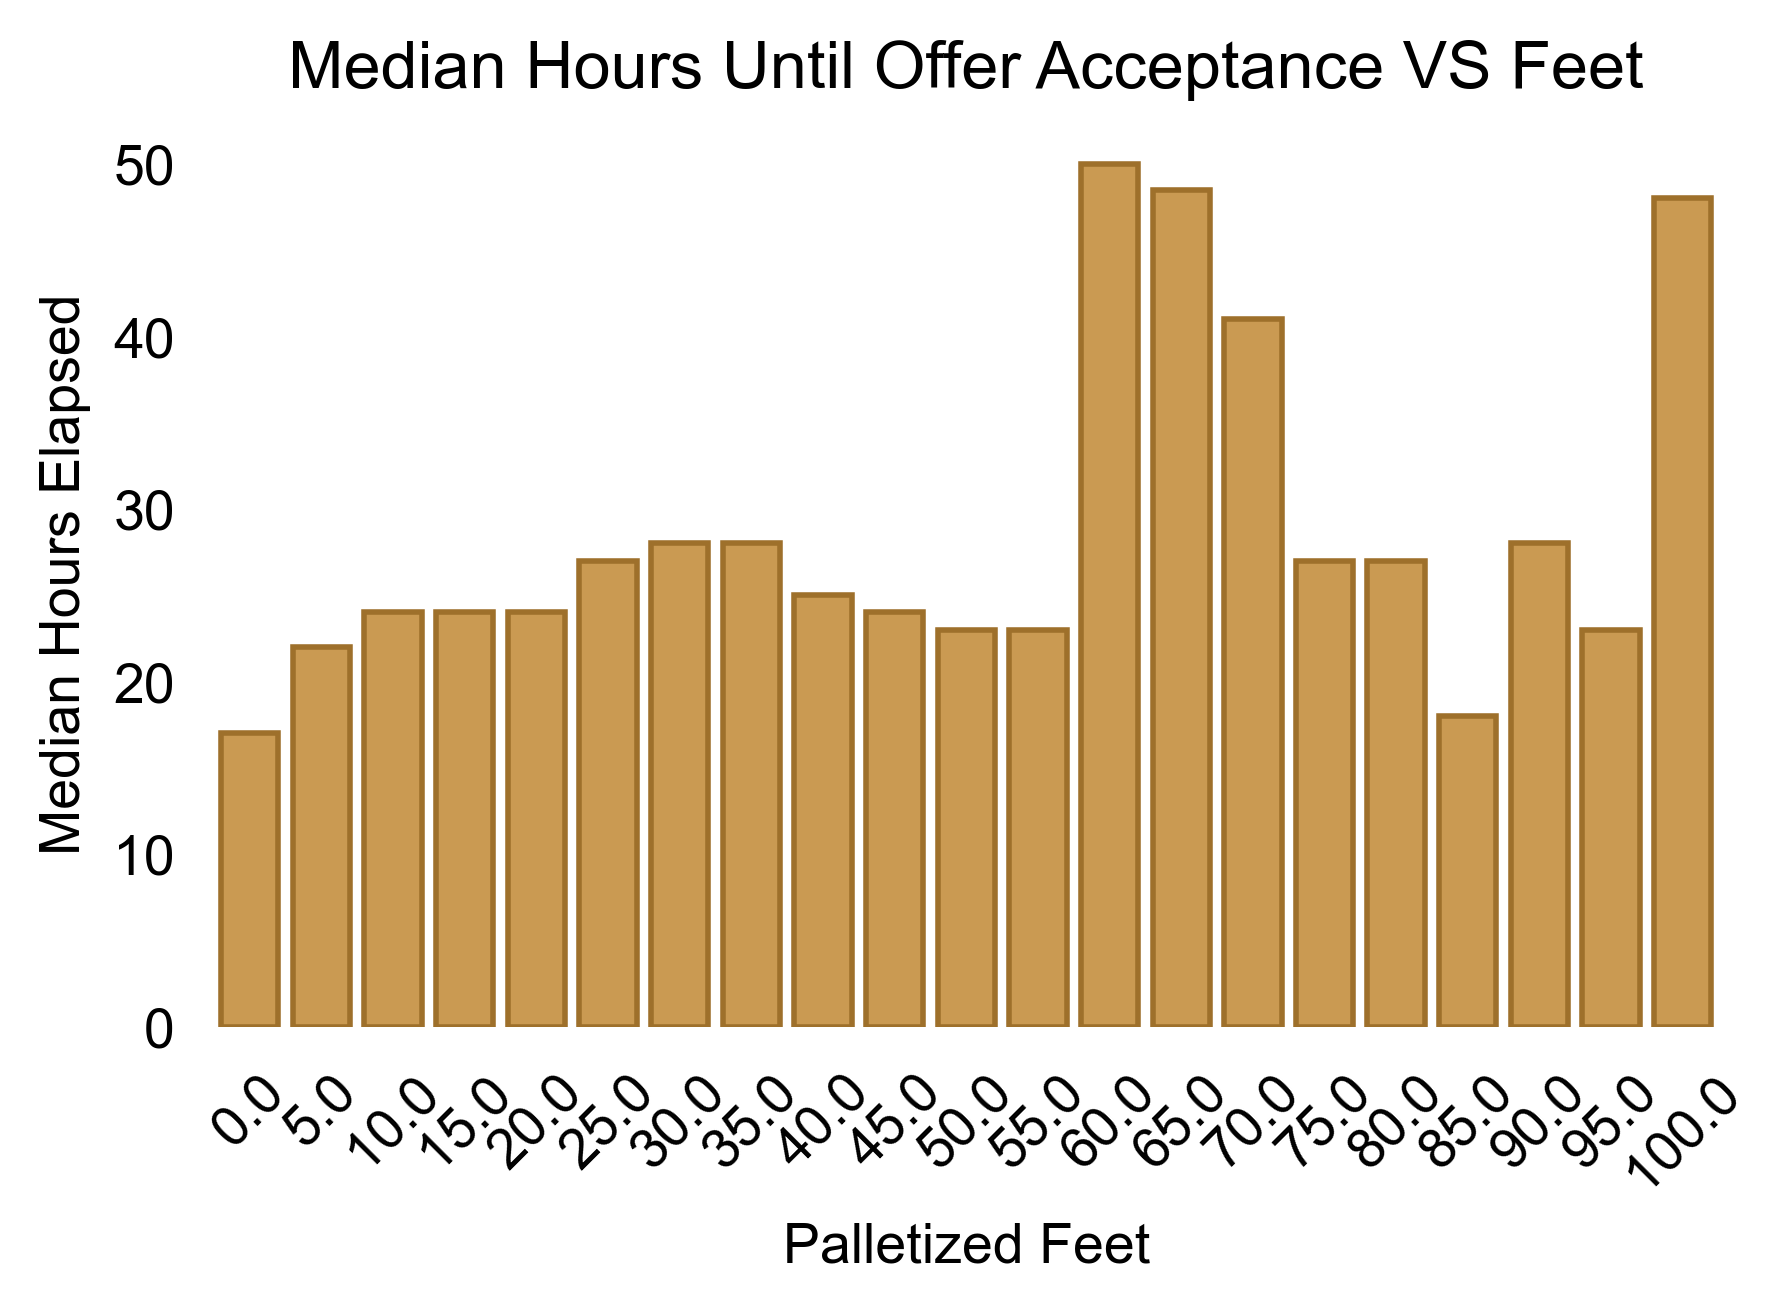

In [44]:
plot = sns.barplot(
    data=time_vs_feet.groupby("FEET_BIN").median().reset_index(), 
    x="FEET_BIN", 
    y="ELAPSED TIME",
    color="#de9e3e", 
    edgecolor="#9e702b", 
    linewidth=1
    )

plt.title("Median Hours Until Offer Acceptance VS Feet")
plt.xlabel("Palletized Feet")
plt.ylabel("Median Hours Elapsed")
plt.xticks(rotation=45)
plt.show()